In [1]:
from fastai import *
from fastai.text import *

In [2]:
!unzip -qq '/content/drive/My Drive/Analytics Vidhya/input/train.zip'

In [3]:
train_df = pd.read_csv('/content/train.csv')

In [4]:
train_df.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20972 entries, 0 to 20971
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    20972 non-null  int64 
 1   TITLE                 20972 non-null  object
 2   ABSTRACT              20972 non-null  object
 3   Computer Science      20972 non-null  int64 
 4   Physics               20972 non-null  int64 
 5   Mathematics           20972 non-null  int64 
 6   Statistics            20972 non-null  int64 
 7   Quantitative Biology  20972 non-null  int64 
 8   Quantitative Finance  20972 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 1.4+ MB


In [6]:
!unzip -qq '/content/drive/My Drive/Analytics Vidhya/input/test.zip'

In [7]:
test_df = pd.read_csv('/content/test.csv')

In [8]:
test_df.head()

,ID,TITLE,ABSTRACT
0,20973,Closed-form Marginal Likelihood in Gamma-Poiss...,We present novel understandings of the Gamma...
1,20974,Laboratory mid-IR spectra of equilibrated and ...,Meteorites contain minerals from Solar Syste...
2,20975,Case For Static AMSDU Aggregation in WLANs,Frame aggregation is a mechanism by which mu...
3,20976,The $Gaia$-ESO Survey: the inner disk intermed...,Milky Way open clusters are very diverse in ...
4,20977,Witness-Functions versus Interpretation-Functi...,Proving that a cryptographic protocol is cor...


In [9]:
test_id = test_df['ID']

In [10]:
train_df['text'] = train_df['TITLE'] + train_df['ABSTRACT']
test_df['text'] = test_df['TITLE'] + test_df['ABSTRACT']

In [11]:
train_df.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,text
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0,Reconstructing Subject-Specific Effect Maps P...
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0,Rotation Invariance Neural Network Rotation i...
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0,Spherical polyharmonics and Poisson kernels fo...
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0,A finite element approximation for the stochas...
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0,Comparative study of Discrete Wavelet Transfor...


In [12]:
data = (TextList.from_df(train_df, cols='text')
                .split_by_rand_pct(0.1, seed=42)
                .label_for_lm()  
                .databunch(bs=128))
data.show_batch()


/usr/local/lib/python3.6/dist-packages/fastai/text/data.py:339: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  idx_min = (t != self.pad_idx).nonzero().min()


idx,text
0,"from the subject 's data . xxmaj while global inference is widely \n used , local inference , which can be used to form subject - specific effect maps , \n is rarely used because existing models often yield noisy detections composed of \n dispersed isolated islands . xxmaj in this article , we propose a reconstruction \n method , named xxup rsm , to improve"
1,"xxunk image of this code . xxmaj when the dimension of the subspaces \n is greater than one , we obtain codes whose alphabet is no longer a finite \n field , but a set of r - xxunk . xxmaj we explain why these codes are practically as \n efficient for applications as the codes defined on an extension of degree r. xxmaj in \n"
2,". \n xxbos xxmaj deep xxmaj multimodal xxmaj image - xxmaj repurposing xxmaj detection xxmaj nefarious actors on social media and other platforms often spread rumors and \n xxunk through images whose metadata ( e.g. , captions ) have been modified to \n provide visual xxunk of the rumor / xxunk . xxmaj this type of modification \n is referred to as image repurposing , in"
3,"$ \ delta \ in \n [ xxunk there exist positive integers $ k , d$ such that for sufficiently large \n $ x$ , the interval $ [ x - x^ \ delta , x]$ contains $ \ xxunk } \ xxunk \ delta } { ( \ log \n xxunk pairs of consecutive primes differing by at most $ d$. xxmaj this confirms a \n"
4,"- to - cable \n ratios . xxmaj this work provides progress in both directions . xxmaj to address the first \n limitation , the objective function for the inverse kinematics optimization \n problem is modified to produce cable tensions as low or lower than before , thus \n reducing the load on the robots ' motors . xxmaj for the second , a reformulation of"


In [13]:
learn = language_model_learner(data, AWD_LSTM, drop_mult=0.3)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


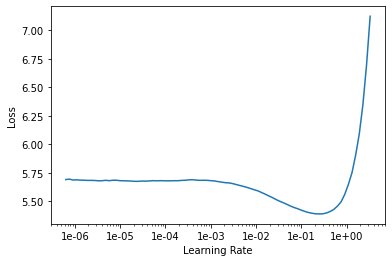

In [14]:
learn.lr_find()
learn.recorder.plot()

In [15]:
learn.fit_one_cycle(5, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.260345,4.060698,0.297792,07:19
1,4.031631,3.936010,0.306432,07:21
2,3.804734,3.864421,0.313170,07:22
3,3.603993,3.820260,0.318383,07:23
4,3.466613,3.812860,0.319063,07:23


In [16]:
learn.predict("The performance of this model is ", n_words=10)

'The performance of this model is  investigated using this task . This is studied by'

In [17]:
learn.save('/content/drive/My Drive/Analytics Vidhya/models/fit-head')

In [18]:
learn.load('/content/drive/My Drive/Analytics Vidhya/models/fit-head')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (18875 items)
x: LMTextList
xxbos xxmaj reconstructing xxmaj subject - xxmaj specific xxmaj effect xxmaj maps xxmaj predictive models allow subject - specific inference when analyzing disease 
  related alterations in neuroimaging data . xxmaj given a subject 's data , inference can 
  be made at two levels : global , i.e. xxunk condition presence for the 
  subject , and local , i.e. detecting condition effect on each individual 
  measurement extracted from the subject 's data . xxmaj while global inference is widely 
  used , local inference , which can be used to form subject - specific effect maps , 
  is rarely used because existing models often yield noisy detections composed of 
  dispersed isolated islands . xxmaj in this article , we propose a reconstruction 
  method , named xxup rsm , to improve subject - specific detections of predictive 
  modeling approaches and in particular , binary classifiers . xxup rsm specific

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 1.00E-04


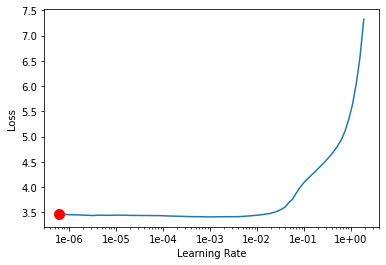

In [19]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)


In [21]:
learn.fit_one_cycle(7, 1e-4, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.363427,3.759415,0.330016,08:49
1,3.307372,3.692589,0.342889,08:47
2,3.255648,3.661201,0.348343,08:47
3,3.210071,3.640923,0.352284,08:44
4,3.200590,3.644109,0.349891,08:47
5,3.158555,3.633756,0.353159,08:48
6,3.146856,3.633995,0.353022,08:44


In [22]:
learn.predict("The performance of this model is ", n_words=10)

'The performance of this model is  assessed on several application to principled data structures driven by'

In [23]:
learn.save_encoder('/content/drive/My Drive/Analytics Vidhya/models/fine_tuned_enc')

In [24]:
label_cols = ['Computer Science', 'Physics' , 'Mathematics' , 'Statistics' , 'Quantitative Biology' , 'Quantitative Finance']

In [25]:
test_datalist = TextList.from_df(test_df, cols='text', vocab=data.vocab)

In [26]:
data_clas = (TextList.from_df(train_df, cols='text', vocab=data.vocab)
             .split_by_rand_pct(0.1, seed=42)
             .label_from_df(cols= label_cols , classes=label_cols)
             .add_test(test_datalist)
             .databunch(bs=64))
data_clas.show_batch()

text,target
xxbos xxmaj on the zeros of xxmaj riemann $ xxmaj xxunk function xxmaj the xxmaj riemann $ \ xxmaj xi(z)$ function ( even in $ z$ ) admits a xxmaj fourier transform of an \n even kernel $ \ xxmaj xxunk t / 2 } \ xxunk t / 2 } \ xxunk xxmaj here \n $ \ xxunk \ xxunk and $ \ xxunk is a xxmaj,Mathematics
"xxbos xxmaj an introduction to xxmaj topological xxmaj data xxmaj analysis : fundamental and practical aspects for data scientists xxmaj topological xxmaj data xxmaj analysis ( tda ) is a recent and fast growing eld providing a \n set of new topological and geometric tools to infer relevant features for \n possibly complex data . xxmaj this paper is a brief introduction , through a few \n",Computer Science;Mathematics;Statistics
"xxbos xxmaj on the xxmaj power of xxmaj truncated xxup svd for xxmaj general xxmaj high - rank xxmaj matrix xxmaj estimation xxmaj problems xxmaj we show that given an estimate $ \ widehat{a}$ that is close to a general \n high - rank positive semi - definite ( xxup psd ) matrix $ xxup a$ in spectral norm ( i.e. , \n $ \ | \ xxunk",Mathematics;Statistics
"xxbos xxmaj centroidal localization game xxmaj one important problem in a network is to locate an ( invisible ) moving entity \n by using distance - detectors placed at xxunk locations . xxmaj for instance , the \n metric dimension of a graph $ xxup g$ is the minimum number $ k$ of detectors placed \n in some vertices $ \ { v_1 , \ cdots ,",Computer Science
xxbos xxmaj the x - ray and xxmaj mid - xxmaj infrared luminosities in xxmaj luminous xxmaj type 1 xxmaj quasars xxmaj several recent studies have reported different intrinsic correlations between \n the xxup agn mid - xxup ir luminosity ( $ xxup xxunk ) and the rest - frame 2 - 10 kev luminosity \n ( $ xxup xxunk ) for luminous quasars . xxmaj to understand,Physics


In [27]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f1_score = partial(fbeta, thresh=0.2, beta=1)

In [28]:
learn_classifier = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, metrics=[acc_02, f1_score])

In [29]:
learn_classifier.load_encoder('/content/drive/My Drive/Analytics Vidhya/models/fine_tuned_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (18875 items)
x: TextList
xxbos xxmaj reconstructing xxmaj subject - xxmaj specific xxmaj effect xxmaj maps xxmaj predictive models allow subject - specific inference when analyzing disease 
  related alterations in neuroimaging data . xxmaj given a subject 's data , inference can 
  be made at two levels : global , i.e. xxunk condition presence for the 
  subject , and local , i.e. detecting condition effect on each individual 
  measurement extracted from the subject 's data . xxmaj while global inference is widely 
  used , local inference , which can be used to form subject - specific effect maps , 
  is rarely used because existing models often yield noisy detections composed of 
  dispersed isolated islands . xxmaj in this article , we propose a reconstruction 
  method , named xxup rsm , to improve subject - specific detections of predictive 
  modeling approaches and in particular , binary classifiers . xxup rsm specifically 

In [30]:
learn_classifier.freeze()

In [31]:
learn_classifier.lr_find()

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.92E-02
Min loss divided by 10: 7.59E-02


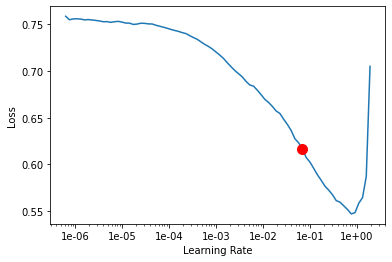

In [32]:
learn_classifier.recorder.plot(suggestion=True)

In [33]:
learn_classifier.fit_one_cycle(5, 3e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.245378,0.202913,0.890320,0.804930,02:41
1,0.229162,0.193884,0.888253,0.805166,02:29
2,0.226848,0.188359,0.898108,0.817222,02:31
3,0.218086,0.181304,0.895009,0.814656,02:47
4,0.207304,0.178634,0.900175,0.820696,02:38


In [34]:
learn_classifier.save('/content/drive/My Drive/Analytics Vidhya/models/first')

In [35]:
learn_classifier.load('/content/drive/My Drive/Analytics Vidhya/models/first')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (18875 items)
x: TextList
xxbos xxmaj reconstructing xxmaj subject - xxmaj specific xxmaj effect xxmaj maps xxmaj predictive models allow subject - specific inference when analyzing disease 
  related alterations in neuroimaging data . xxmaj given a subject 's data , inference can 
  be made at two levels : global , i.e. xxunk condition presence for the 
  subject , and local , i.e. detecting condition effect on each individual 
  measurement extracted from the subject 's data . xxmaj while global inference is widely 
  used , local inference , which can be used to form subject - specific effect maps , 
  is rarely used because existing models often yield noisy detections composed of 
  dispersed isolated islands . xxmaj in this article , we propose a reconstruction 
  method , named xxup rsm , to improve subject - specific detections of predictive 
  modeling approaches and in particular , binary classifiers . xxup rsm specifically 

In [36]:
learn_classifier.freeze_to(-2)

In [37]:
learn_classifier.fit_one_cycle(3, slice(2e-2/(2.6**4), 2e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.229513,0.199074,0.903036,0.816102,03:10
1,0.198353,0.178980,0.906215,0.831632,03:10
2,0.176955,0.171487,0.912415,0.840614,03:00


In [38]:
learn_classifier.save('/content/drive/My Drive/Analytics Vidhya/models/second')
learn_classifier.load('/content/drive/My Drive/Analytics Vidhya/models/second')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (18875 items)
x: TextList
xxbos xxmaj reconstructing xxmaj subject - xxmaj specific xxmaj effect xxmaj maps xxmaj predictive models allow subject - specific inference when analyzing disease 
  related alterations in neuroimaging data . xxmaj given a subject 's data , inference can 
  be made at two levels : global , i.e. xxunk condition presence for the 
  subject , and local , i.e. detecting condition effect on each individual 
  measurement extracted from the subject 's data . xxmaj while global inference is widely 
  used , local inference , which can be used to form subject - specific effect maps , 
  is rarely used because existing models often yield noisy detections composed of 
  dispersed isolated islands . xxmaj in this article , we propose a reconstruction 
  method , named xxup rsm , to improve subject - specific detections of predictive 
  modeling approaches and in particular , binary classifiers . xxup rsm specifically 

In [40]:
learn_classifier.freeze_to(-3)

In [41]:
learn_classifier.fit_one_cycle(2, slice(5e-3/(2.6**4), 5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.172983,0.179188,0.908202,0.830854,05:23
1,0.156373,0.171529,0.913368,0.843395,05:05


In [42]:
learn_classifier.save('/content/drive/My Drive/Analytics Vidhya/models/third')
learn_classifier.load('/content/drive/My Drive/Analytics Vidhya/models/third')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (18875 items)
x: TextList
xxbos xxmaj reconstructing xxmaj subject - xxmaj specific xxmaj effect xxmaj maps xxmaj predictive models allow subject - specific inference when analyzing disease 
  related alterations in neuroimaging data . xxmaj given a subject 's data , inference can 
  be made at two levels : global , i.e. xxunk condition presence for the 
  subject , and local , i.e. detecting condition effect on each individual 
  measurement extracted from the subject 's data . xxmaj while global inference is widely 
  used , local inference , which can be used to form subject - specific effect maps , 
  is rarely used because existing models often yield noisy detections composed of 
  dispersed isolated islands . xxmaj in this article , we propose a reconstruction 
  method , named xxup rsm , to improve subject - specific detections of predictive 
  modeling approaches and in particular , binary classifiers . xxup rsm specifically 

In [43]:
learn_classifier.unfreeze()

In [44]:
learn_classifier.fit_one_cycle(3, slice(1e-3/(2.6**4), 1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.149096,0.171310,0.914878,0.844890,06:55
1,0.145889,0.171962,0.915832,0.844174,06:26
2,0.140586,0.174215,0.918375,0.846368,07:12


In [45]:
learn_classifier.save('/content/drive/My Drive/Analytics Vidhya/models/fourth')
learn_classifier.load('/content/drive/My Drive/Analytics Vidhya/models/fourth')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (18875 items)
x: TextList
xxbos xxmaj reconstructing xxmaj subject - xxmaj specific xxmaj effect xxmaj maps xxmaj predictive models allow subject - specific inference when analyzing disease 
  related alterations in neuroimaging data . xxmaj given a subject 's data , inference can 
  be made at two levels : global , i.e. xxunk condition presence for the 
  subject , and local , i.e. detecting condition effect on each individual 
  measurement extracted from the subject 's data . xxmaj while global inference is widely 
  used , local inference , which can be used to form subject - specific effect maps , 
  is rarely used because existing models often yield noisy detections composed of 
  dispersed isolated islands . xxmaj in this article , we propose a reconstruction 
  method , named xxup rsm , to improve subject - specific detections of predictive 
  modeling approaches and in particular , binary classifiers . xxup rsm specifically 

In [46]:
learn_classifier.show_results()

text,target,prediction
"xxbos xxmaj stable and unstable vortex knots in a trapped xxmaj bose - xxmaj einstein condensate xxmaj the dynamics of a quantum vortex torus knot $ { \ cal xxup xxunk , xxup q}$ and similar \n knots in an atomic xxmaj bose - xxmaj einstein condensate at zero temperature in the \n xxmaj thomas - xxmaj fermi regime has been considered in the hydrodynamic approximation . xxmaj",Physics,Physics
"xxbos q - analogues of the xxmaj xxunk - xxmaj stirling numbers xxmaj let $ xxmaj f_n$ denote the $ n^{th}$ xxmaj fibonacci number relative to the initial \n conditions $ xxup xxunk $ and $ xxup xxunk xxmaj xxunk , xxmaj xxunk , and xxmaj xxunk introduced xxmaj fibonacci \n analogues of the xxmaj stirling numbers called xxmaj xxunk - xxmaj stirling numbers of the first and",Mathematics,Mathematics
xxbos xxmaj xxunk - xxunk : an optical to near - infrared survey of emission - line galaxies at $ \ bf xxunk - 4.7 $ xxmaj we present a sample of $ \ sim 1000 $ emission line galaxies at $ xxunk - 4.7 $ from \n the $ \ xxunk $ xxmaj high-$z$ xxmaj emission xxmaj line xxmaj survey ( xxunk ) in the xxmaj xxunk \n,Physics,Physics
"xxbos xxmaj relative xxmaj error xxmaj tensor xxmaj low xxmaj rank xxmaj approximation xxmaj we consider relative error low rank approximation of $ xxunk with respect \n to the xxmaj frobenius norm : given an xxunk tensor $ a \ in \n \ xxunk { \ xxunk xxunk , output a rank-$k$ tensor $ xxup b$ for which \n $ \ xxup |a - b \ xxup",Computer Science,Computer Science;Statistics
"xxbos xxmaj clarifying the xxmaj hubble constant tension with a xxmaj bayesian hierarchical model of the local distance ladder xxmaj estimates of the xxmaj hubble constant , $ xxup h_0 $ , from the distance ladder and the \n cosmic microwave background ( xxup cmb ) differ at the $ \ xxunk \ sigma$ level , \n indicating a potential issue with the standard $ \ lambda$cdm cosmology",Physics,Physics


# Predict

In [47]:
preds, target = learn_classifier.get_preds(DatasetType.Test, ordered=True)
labels = preds.numpy()

submission = pd.DataFrame({'ID': test_id})
submission = pd.concat([submission, pd.DataFrame(preds.numpy(), columns = label_cols)], axis=1)

submission.to_csv('/content/drive/My Drive/Analytics Vidhya/output/ulm_proba.csv', index=False)
submission.head()

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,20973,0.319749,0.002392,0.072063,0.961879,1.589267e-03,0.004184
1,20974,0.000007,0.999445,0.000480,0.000509,3.685447e-07,0.000006
2,20975,0.980287,0.003167,0.029983,0.056304,7.086441e-05,0.000016
3,20976,0.000260,0.998928,0.000090,0.002511,8.597167e-06,0.000013
4,20977,0.999607,0.000029,0.001662,0.000413,7.424675e-07,0.000001
